<a href="https://colab.research.google.com/github/MTDTMFH/Projects/blob/master/20M53078_Haruyama_Mattthew_lesson7_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow と tf.keras のインポート
# そのほかの環境構築とケラスの設定

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from pprint import pprint

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical



In [2]:
#VGG16
#imagenet = original model
model_vgg16 = tf.keras.applications.vgg16.VGG16(weights='imagenet')
model_vgg16.summary()

553467904/553467096 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [3]:
from google.colab import files
files.upload()

Saving 17flowers_all.zip to 17flowers_all.zip


In [4]:
!unzip 17flowers_all.zip

Archive:  17flowers_all.zip
   creating: 17flowers_all/
  inflating: 17flowers_all/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/17flowers_all/
  inflating: __MACOSX/17flowers_all/._.DS_Store  
  inflating: 17flowers_all/17flowers-labels.txt  
  inflating: __MACOSX/17flowers_all/._17flowers-labels.txt  
   creating: 17flowers_all/test/
   creating: 17flowers_all/test/Fritillary/
  inflating: 17flowers_all/test/Fritillary/image_0708.jpg  
   creating: __MACOSX/17flowers_all/test/
   creating: __MACOSX/17flowers_all/test/Fritillary/
  inflating: __MACOSX/17flowers_all/test/Fritillary/._image_0708.jpg  
  inflating: 17flowers_all/test/Fritillary/image_0709.jpg  
  inflating: __MACOSX/17flowers_all/test/Fritillary/._image_0709.jpg  
  inflating: 17flowers_all/test/Fritillary/image_0719.jpg  
  inflating: __MACOSX/17flowers_all/test/Fritillary/._image_0719.jpg  
  inflating: 17flowers_all/test/Fritillary/image_0718.jpg  
  inflating: __MACOSX/17flowers_all/test/Fritillary/._image

17flowers_all/train/Bluebell/image_0245.jpg


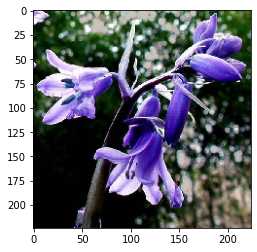

40960/35363 [==================================] - 0s 0us/step
[[('n02206856', 'bee', 0.26043636),
  ('n02219486', 'ant', 0.110359535),
  ('n03930313', 'picket_fence', 0.09298427),
  ('n11939491', 'daisy', 0.08929878),
  ('n02280649', 'cabbage_butterfly', 0.076705694),
  ('n02279972', 'monarch', 0.05326144),
  ('n01833805', 'hummingbird', 0.050744064),
  ('n02168699', 'long-horned_beetle', 0.035289347),
  ('n02281406', 'sulphur_butterfly', 0.03403571),
  ('n03991062', 'pot', 0.025045643)]]
17flowers_all/train/Pansy/image_1333.jpg


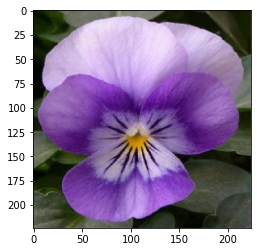

[[('n03991062', 'pot', 0.29086775),
  ('n02206856', 'bee', 0.0811069),
  ('n02219486', 'ant', 0.045560654),
  ('n04522168', 'vase', 0.04082701),
  ('n11939491', 'daisy', 0.039723042),
  ('n07714571', 'head_cabbage', 0.0383104),
  ('n03930313', 'picket_fence', 0.022904223),
  ('n02281406', 'sulphur_butterfly', 0.019257976),
  ('n02280649', 'cabbage_butterfly', 0.018945925),
  ('n02869837', 'bonnet', 0.017521998)]]
17flowers_all/train/Tulip/image_0580.jpg


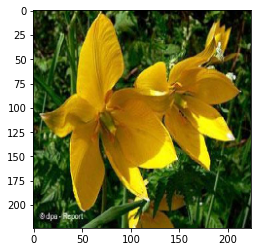

[[('n11879895', 'rapeseed', 0.7992549),
  ('n02281406', 'sulphur_butterfly', 0.07718883),
  ('n12057211', "yellow_lady's_slipper", 0.05670996),
  ('n03991062', 'pot', 0.023401184),
  ('n03930313', 'picket_fence', 0.011712264),
  ('n02280649', 'cabbage_butterfly', 0.0038042401),
  ('n11939491', 'daisy', 0.0032974107),
  ('n07749582', 'lemon', 0.003247232),
  ('n03944341', 'pinwheel', 0.001450364),
  ('n02206856', 'bee', 0.0014209354)]]
17flowers_all/train/Tigerliliy/image_0500.jpg


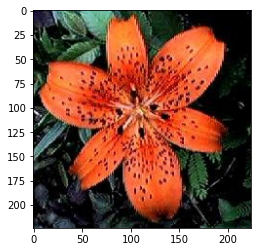

[[('n02281787', 'lycaenid', 0.56561095),
  ('n02277742', 'ringlet', 0.08280672),
  ('n03991062', 'pot', 0.054376252),
  ('n07745940', 'strawberry', 0.05294927),
  ('n02281406', 'sulphur_butterfly', 0.030968472),
  ('n12620546', 'hip', 0.018940292),
  ('n02276258', 'admiral', 0.018786179),
  ('n02279972', 'monarch', 0.016622597),
  ('n07716358', 'zucchini', 0.013840226),
  ('n13040303', 'stinkhorn', 0.013790779)]]


In [5]:
#これらの画像は、オクスフォード大学のVGGが提供する「17 Category Flower Dataset」です。
#http://www.robots.ox.ac.uk/~vgg/data/flowers/17/index.html
fileList = ["17flowers_all/train/Bluebell/image_0245.jpg","17flowers_all/train/Pansy/image_1333.jpg","17flowers_all/train/Tulip/image_0580.jpg", "17flowers_all/train/Tigerliliy/image_0500.jpg"]

#fileListの4枚を例として抽出
for path in fileList:
    print(path)
    img = load_img(path, target_size=(224, 224))
    
    fig = plt.Figure(figsize=(5,5),dpi=75)
    plt.imshow(img)
    plt.show()
    
    img = img_to_array(img)
    img = tf.keras.applications.vgg16.preprocess_input(img)
#model prediction as above
    predict = model_vgg16.predict(img[tf.newaxis, ...])
    result = tf.keras.applications.vgg16.decode_predictions(predict, top=10)
    pprint(result)


 転移学習なしでは結果がめちゃくちゃ。
 

In [6]:
#転移学習
#特徴量の抽出・学習がすでになされているので、より効果的に学習をすることができる。転移学習は類似した対象でなければ効果は低い（はな　と　はな）対（はな　と　車）
import tensorflow
from tensorflow.keras.optimizers import SGD

baseModel = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_tensor=tensorflow.keras.Input(shape=(224, 224, 3)))
#False - VGG１６の一番下に当たる分類に使われている全結合層のところがなくなった状態で読み込む

baseModel.summary()

#転移学習のモデル
model2 = tf.keras.Sequential([
    baseModel,
    tf.keras.layers.Flatten(), #reduce to 1-n picture
    Dense(128, activation='relu'), # 全結合層で入力
    tf.keras.layers.Dense(17, activation='softmax') #ソフトマックス関数で分類（17種類）
])




for layer in baseModel.layers:
    layer.trainable = False
    #If true it will retrain the model

model2.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])

model2.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [7]:
import tensorflow.keras.preprocessing.image as Image

train_datagen = Image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)


validation_datagen = Image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

#increase the data set using the ImageDataGenerator function 
'''
ImageDataGeneratorは、パラメータを指定することで、元のデータから、回転、移動、シアー変換、左右反転などをしてデータを増やすことができる。
datagen = Image.ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
'''

BATCH_SIZE = 1

#creation of 17 categories of flowers as per the directory -> you could increase the batch_size to more if need be.
train_generator = train_datagen.flow_from_directory(
   '17flowers_all/train',
   target_size=(224, 224),
   batch_size=BATCH_SIZE,
   class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
   '17flowers_all/test',
   target_size=(224, 224),
   batch_size=BATCH_SIZE,
   class_mode='categorical'
)

Found 1020 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


In [9]:


model2.compile(optimizer=SGD(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
result = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // BATCH_SIZE,
    epochs=6
)

Epoch 1/6
1020/1020 [==============================] - 33s 33ms/step - loss: 2.9765 - accuracy: 0.6118 - val_loss: 1.8748 - val_accuracy: 0.5353
Epoch 2/6
1020/1020 [==============================] - 33s 33ms/step - loss: 0.1962 - accuracy: 0.9382 - val_loss: 1.8915 - val_accuracy: 0.6029
Epoch 3/6
1020/1020 [==============================] - 33s 33ms/step - loss: 0.0440 - accuracy: 0.9892 - val_loss: 1.8723 - val_accuracy: 0.6235
Epoch 4/6
1020/1020 [==============================] - 33s 32ms/step - loss: 0.0172 - accuracy: 0.9951 - val_loss: 1.9244 - val_accuracy: 0.6176
Epoch 5/6
1020/1020 [==============================] - 33s 33ms/step - loss: 0.0096 - accuracy: 0.9990 - val_loss: 1.9551 - val_accuracy: 0.6206
Epoch 6/6
1020/1020 [==============================] - 33s 32ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 2.0205 - val_accuracy: 0.6265


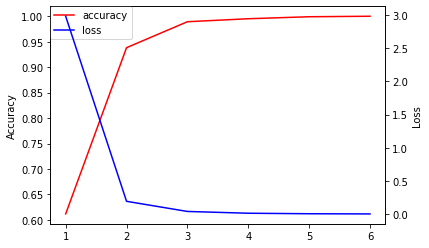

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
epochs = 6

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(range(1, epochs+1), result.history['accuracy'], label="accuracy",c='r')
ax2.plot(range(1, epochs+1), result.history['loss'], label="loss",c='b')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)

plt.show()

17flowers_all/test/Bluebell/image_0312.jpg


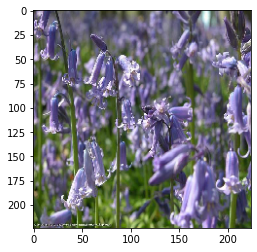

Bluebell
Bluebell 0.99996984
Buttercup 7.141555e-09
Colts'Foot 4.2380618e-10
Cowslip 4.7903013e-06
Crocus 3.9879356e-07
Daffodil 1.4231503e-08
Daisy 6.2981854e-08
Dandelion 3.3451755e-09
Fritillary 1.7525995e-06
Iris 8.066073e-06
LilyValley 1.2996675e-05
Pansy 1.6513054e-06
Snowdrop 5.196493e-11
Sunflower 7.6568654e-08
Tigerliliy 1.7128195e-07
Tulip 2.4465251e-08
Windflower 9.339503e-08
17flowers_all/test/Pansy/image_1351.jpg


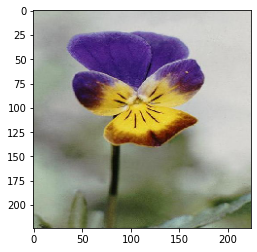

Pansy
Bluebell 1.11414844e-11
Buttercup 0.020845803
Colts'Foot 3.1022082e-06
Cowslip 7.3376114e-13
Crocus 1.0349429e-06
Daffodil 1.1508626e-05
Daisy 1.0589776e-10
Dandelion 8.632172e-10
Fritillary 0.0032233675
Iris 4.364638e-06
LilyValley 6.788224e-10
Pansy 0.9487667
Snowdrop 3.9202753e-08
Sunflower 1.6974405e-09
Tigerliliy 0.00079009385
Tulip 0.026354026
Windflower 3.5587924e-08
17flowers_all/test/Tulip/image_0636.jpg


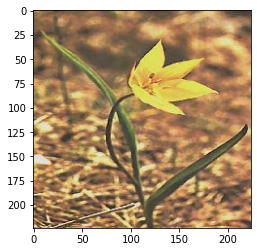

Daffodil
Bluebell 0.12475418
Buttercup 0.009528271
Colts'Foot 0.11116394
Cowslip 2.3637926e-06
Crocus 0.0002892689
Daffodil 0.5031371
Daisy 0.004466437
Dandelion 1.649769e-09
Fritillary 2.6485077e-07
Iris 0.00024140078
LilyValley 0.0005825938
Pansy 9.9965466e-05
Snowdrop 0.0013603208
Sunflower 2.5883079e-05
Tigerliliy 5.195783e-05
Tulip 0.24429585
Windflower 1.931883e-07
17flowers_all/test/Tigerliliy/image_0555.jpg


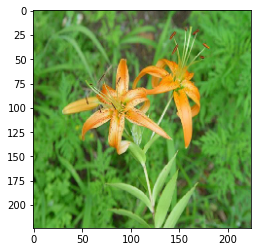

Tulip
Bluebell 0.0004339001
Buttercup 4.6648023e-07
Colts'Foot 0.00012296274
Cowslip 0.17315696
Crocus 0.0016776203
Daffodil 1.4830729e-05
Daisy 1.0314957e-06
Dandelion 9.784104e-08
Fritillary 3.7569684e-08
Iris 2.212067e-06
LilyValley 0.0018601114
Pansy 2.6219812e-08
Snowdrop 2.4376859e-05
Sunflower 7.0217266e-06
Tigerliliy 3.7402415e-06
Tulip 0.82269406
Windflower 5.9433904e-07


In [12]:
fileList = ["17flowers_all/test/Bluebell/image_0312.jpg",
            "17flowers_all/test/Pansy/image_1351.jpg",
            "17flowers_all/test/Tulip/image_0636.jpg",
            "17flowers_all/test/Tigerliliy/image_0555.jpg"]

labels = ["Bluebell", "Buttercup", "Colts'Foot", "Cowslip", "Crocus", "Daffodil", "Daisy", "Dandelion", "Fritillary", "Iris", "LilyValley", "Pansy", "Snowdrop", "Sunflower", "Tigerliliy", "Tulip", "Windflower"]

for path in fileList:
    print(path)
    img = load_img(path, target_size=(224, 224))
    
    fig = plt.Figure(figsize=(5,5),dpi=75)
    plt.imshow(img)
    plt.show()
    
    img = img_to_array(img)
    img = tf.keras.applications.vgg16.preprocess_input(img)

    predict = model2.predict(img[tf.newaxis, ...])
    print(labels[np.argmax(predict)])
    for i in range(len(labels)):
        print(labels[i],predict[0][i])






17flowers_all/newimages/Bluebell_01.jpeg


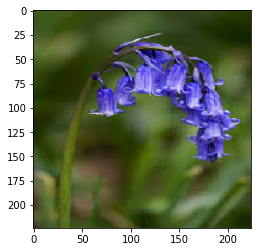

Bluebell
Bluebell 0.9999963
Buttercup 1.5396659e-13
Colts'Foot 1.481835e-13
Cowslip 1.3060723e-09
Crocus 2.3834864e-12
Daffodil 1.6369406e-14
Daisy 2.589041e-13
Dandelion 4.436044e-12
Fritillary 5.3390508e-17
Iris 3.6818496e-06
LilyValley 3.9353377e-12
Pansy 6.951442e-16
Snowdrop 4.6063317e-22
Sunflower 5.1031124e-11
Tigerliliy 1.0412611e-14
Tulip 5.1172695e-13
Windflower 3.5772176e-16
17flowers_all/newimages/Pansy_01.jpeg


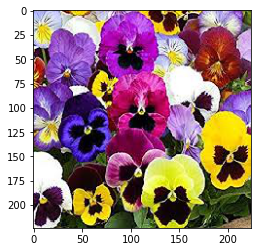

Cowslip
Bluebell 1.2793441e-06
Buttercup 2.9665697e-08
Colts'Foot 3.9112025e-10
Cowslip 0.99987066
Crocus 3.1354205e-06
Daffodil 2.1370364e-05
Daisy 1.02678546e-10
Dandelion 1.167762e-18
Fritillary 3.3419626e-12
Iris 8.716751e-09
LilyValley 6.831956e-06
Pansy 1.0831442e-05
Snowdrop 3.8151778e-12
Sunflower 7.9224e-09
Tigerliliy 4.941442e-10
Tulip 8.4060426e-05
Windflower 1.722375e-06
17flowers_all/newimages/Tulip_01.jpeg


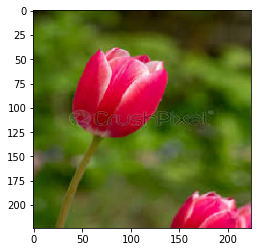

Tigerliliy
Bluebell 0.020382563
Buttercup 0.039663117
Colts'Foot 0.00031653116
Cowslip 9.0879723e-07
Crocus 7.1374056e-06
Daffodil 4.803573e-06
Daisy 5.845992e-07
Dandelion 2.13532e-08
Fritillary 2.6577902e-05
Iris 0.00025951568
LilyValley 0.00020985099
Pansy 2.2776403e-05
Snowdrop 2.3293246e-08
Sunflower 1.2649997e-09
Tigerliliy 0.93893427
Tulip 8.9493464e-05
Windflower 8.1815124e-05
17flowers_all/newimages/TigerLily_01.jpg


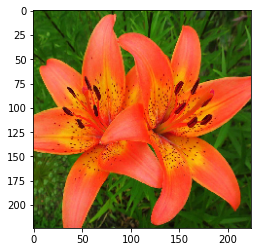

Crocus
Bluebell 2.3555278e-07
Buttercup 1.3041085e-10
Colts'Foot 1.1769251e-08
Cowslip 6.701064e-15
Crocus 0.95407456
Daffodil 2.7511004e-13
Daisy 2.7332284e-13
Dandelion 1.7995512e-10
Fritillary 4.0809907e-09
Iris 0.00010961105
LilyValley 1.3196703e-09
Pansy 0.0037949448
Snowdrop 4.6016556e-14
Sunflower 1.5706977e-11
Tigerliliy 0.04201188
Tulip 8.761012e-06
Windflower 7.481166e-12


In [13]:
#ネットの画像でモデルを確認: １回目

fileList = ["17flowers_all/newimages/Bluebell_01.jpeg",
            "17flowers_all/newimages/Pansy_01.jpeg",
            "17flowers_all/newimages/Tulip_01.jpeg",
            "17flowers_all/newimages/TigerLily_01.jpg"]

labels = ["Bluebell", "Buttercup", "Colts'Foot", "Cowslip", "Crocus", "Daffodil", "Daisy", "Dandelion", "Fritillary", "Iris", "LilyValley", "Pansy", "Snowdrop", "Sunflower", "Tigerliliy", "Tulip", "Windflower"]

for path in fileList:
    print(path)
    img = load_img(path, target_size=(224, 224))
    
    fig = plt.Figure(figsize=(5,5),dpi=75)
    plt.imshow(img)
    plt.show()
    
    img = img_to_array(img)
    img = tf.keras.applications.vgg16.preprocess_input(img)

    predict = model2.predict(img[tf.newaxis, ...])
    print(labels[np.argmax(predict)])
    for i in range(len(labels)):
        print(labels[i],predict[0][i])


結果は４戦３敗と苦戦。なぜ識別できなかったのかを以下にまとめた：

1) Pansy - 故意に複数のPansyが写っている写真を選択したので、結果は思惑通り。単体でトレーニングされているから、複数が同時に載っている写真だと識別しづらい。
2) Tulip -  掲載先の文字が背景に載っている写真だとどうなるか試してみた。学習用の写真を後ほど確認したところ黄色のチューリップだけで学習されていたことが判明。２回目の際に黄色のチューリップを選択することに。
3) Tiger Lily - こちらもPansy同様、単体でなく２つのTiger Lilyが載っている写真を選択した為、識別に失敗。


17flowers_all/newimages/Bluebell_02.jpeg


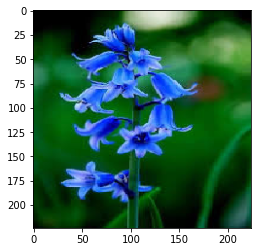

Bluebell
Bluebell 0.9999796
Buttercup 1.2596295e-09
Colts'Foot 2.3099683e-10
Cowslip 3.5835288e-07
Crocus 1.0010613e-08
Daffodil 3.9415712e-10
Daisy 2.9492035e-09
Dandelion 3.382691e-09
Fritillary 3.8288586e-10
Iris 1.744485e-05
LilyValley 2.4948245e-06
Pansy 3.5169407e-08
Snowdrop 1.7415633e-12
Sunflower 5.4214084e-08
Tigerliliy 1.8344253e-09
Tulip 4.8865715e-08
Windflower 5.5615317e-09
17flowers_all/newimages/Pansy_02.jpeg


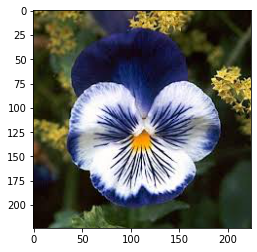

Pansy
Bluebell 4.773117e-22
Buttercup 1.2947968e-15
Colts'Foot 9.371212e-14
Cowslip 1.6246009e-25
Crocus 1.2993677e-09
Daffodil 2.9697648e-20
Daisy 4.1443668e-20
Dandelion 1.7250771e-09
Fritillary 5.4015266e-07
Iris 7.500597e-06
LilyValley 1.945224e-17
Pansy 0.999992
Snowdrop 9.931542e-21
Sunflower 6.0832687e-14
Tigerliliy 1.4349984e-15
Tulip 2.0878376e-16
Windflower 3.2504484e-18
17flowers_all/newimages/Tulip_02.jpeg


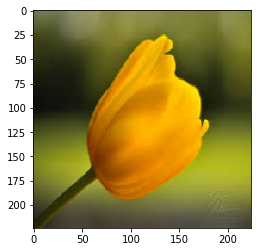

Tulip
Bluebell 1.5557569e-06
Buttercup 0.30531543
Colts'Foot 1.3615968e-05
Cowslip 3.7764246e-07
Crocus 1.4963288e-05
Daffodil 0.00029910356
Daisy 7.289749e-08
Dandelion 2.0818037e-11
Fritillary 1.4489187e-07
Iris 1.3807331e-06
LilyValley 1.501739e-06
Pansy 0.00491192
Snowdrop 0.00097420876
Sunflower 3.46511e-06
Tigerliliy 2.4406769e-05
Tulip 0.68843734
Windflower 5.0527495e-07
17flowers_all/newimages/TigerLily_02.jpeg


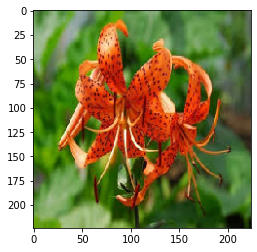

Tigerliliy
Bluebell 2.2186033e-13
Buttercup 8.055436e-27
Colts'Foot 2.8945012e-30
Cowslip 7.5719295e-31
Crocus 1.1937509e-24
Daffodil 9.193677e-25
Daisy 2.4870947e-27
Dandelion 1.7941397e-12
Fritillary 1.9399111e-25
Iris 6.4343846e-15
LilyValley 1.3411821e-17
Pansy 1.7785129e-33
Snowdrop 2.7496846e-22
Sunflower 3.4915786e-09
Tigerliliy 1.0
Tulip 2.7053048e-26
Windflower 3.3284764e-30


In [15]:
#ネットの画像でモデルを確認: 2回目

fileList = ["17flowers_all/newimages/Bluebell_02.jpeg",
            "17flowers_all/newimages/Pansy_02.jpeg",
            "17flowers_all/newimages/Tulip_02.jpeg",
            "17flowers_all/newimages/TigerLily_02.jpeg"]

labels = ["Bluebell", "Buttercup", "Colts'Foot", "Cowslip", "Crocus", "Daffodil", "Daisy", "Dandelion", "Fritillary", "Iris", "LilyValley", "Pansy", "Snowdrop", "Sunflower", "Tigerliliy", "Tulip", "Windflower"]

for path in fileList:
    print(path)
    img = load_img(path, target_size=(224, 224))
    
    fig = plt.Figure(figsize=(5,5),dpi=75)
    plt.imshow(img)
    plt.show()
    
    img = img_to_array(img)
    img = tf.keras.applications.vgg16.preprocess_input(img)

    predict = model2.predict(img[tf.newaxis, ...])
    print(labels[np.argmax(predict)])
    for i in range(len(labels)):
        print(labels[i],predict[0][i])


 2回目のテストでは全ての画像を正確に認識できた。
 

# 講義の感想

###  良かったところ


機械学習の理論と実践を体験できて大変有難く存じます。プログラミングの初心者として恥ずかしくてあまり質問をしませんでしが、この授業のお陰で最近ではコツコツとpythonの勉強に育めるようになりましたので感謝の意を申し上げたい次第です。




### よくなかったところ（改善点）＋　含めて欲しかったところ・不要だったところ


プログラミングの初心者としては、バグが発生した際の対応がものすごく大変で自分の勉強不足を実感する機会となりました。授業では、実装のところを一つ一つ丁寧にご教示いただけたことに感謝しておりますが、未経験者からするとハードルが高かったところもありました。

個人的には第一回、第2回ぐらいはもう少し基礎知識の構築、演習でコーディングを身につけてから機械学習の実装に進んだ方がよかったのではと感じました。

環境構築はプログラミング経験なしでも事前に準備できるかと思うので、事前宿題にすると時間配分が取れるのではないかとも感じました。

Slackのチャンネルなどがあれば、学生間のバク対策等のふれあい、学ぶ場が増えるのではとも思いました。情報工学系の授業ではこのようにしているそうですが、モニタリングなどどのように管轄しているのかは存じあげませんので恐縮です。

上記の点は単に改善点であり、全体としては大変有意義な授業であったと存じ上げます。